# SVD for SasView

### Import the Required libraries

In [185]:
from sasdata.dataloader.loader import Loader
from sas.sascalc.pr.invertor import Invertor
import matplotlib.pyplot as plt
import numpy as np

### Load the data and set the necessary variables

In [186]:
raw_data = Loader()
test_data = raw_data.load("1d_data/1umSlitSmearSphere.ABS")
q = test_data[0].x
Iq = test_data[0].y
error = test_data[0].dy

# q = np.sqrt(x_data**2 + y_data**2)
# Iq = data

Nq=len(q) # total number of combined q and theta values
qmax=round(max(q),2)
qmin=13

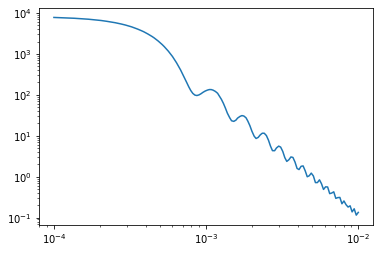

In [187]:
plt.loglog(q, Iq,'-')
plt.show()

In [197]:
Nr=51 # number of r values in P(r) distributions
Dmax=20000 # maximal size of scatteres as usually defined for IFTs
N=Nr*Nphi # total number of combined r and phi values 

In [223]:
r1=np.linspace(0,Dmax,Nr)
r1[0]=+1.e-3 # r can't start at 0

Deltaphi=360.0/float(Nphi)
phi11=np.linspace(0.,360.0-Deltaphi,Nphi)
phi1=phi11/180.0*np.pi
       
r=[]
phi=[]
phiGrad=[]

for i in range(Nphi):
    for j in range(Nr):
        r.append(r1[j])


### Construction of matrix K for the the input for SVD

In [224]:
qmat=np.tile(q,(N,1)).T
rmat=np.tile(r,(Nq,1))

K = np.cos(qmat*rmat)
print("qmat.shape = {}\nrmat.shape = {}".format(qmat.shape, rmat.shape))

qmat.shape = (150, 3672)
rmat.shape = (150, 3672)


### Runing the SVD algorithm

In [225]:
U, s, V = np.linalg.svd( K, full_matrices=False)
rank=2 # number of singular values considered for reconstruction

In [226]:
# A.2) reconstruction of correlation function P(r)

b=(U.T).dot(Iq)
g=[]
for i in range(len(b)):
    if s[i]>rank:
        g.append(b[i]/s[i])
    else:
        g.append(0)

g=np.asarray(g)
Vm=(V.T).dot(g)
Pr=np.asarray(Vm)  
PrList=np.reshape(Pr,(Nphi,Nr))
Iqfit=K.dot(Pr)

PrList=np.reshape(Pr,(Nphi,Nr))

### Ploting

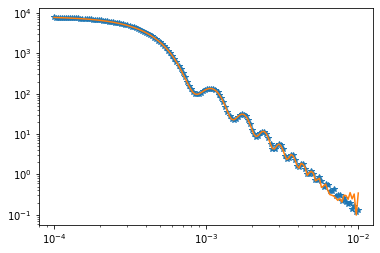

In [ ]:
plt.loglog(q,Iq,'*')
plt.loglog(q,Iqfit,'-')
plt.show()
print('Figure A.1: 1D plot of data and fit (TSVD)')

for i in range(Nphi):    
    plt.plot(r1,PrList[i,:])
plt.axhline(y=0.0, color='r', linestyle='-')    
plt.show()  

PrMax=abs(np.max(Pr))
r=np.asarray(r)
sP=r*0.5